<a href="https://colab.research.google.com/github/kostistzim/Airbnb-Athens-Data-Analysis/blob/main/AirBnb_Athens_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')






In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
listings = pd.read_csv('/content/drive/MyDrive/airbnbanalysis/listings.csv')

list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

**for this analysis we will use specific columns of our interest, listed below.**

In [8]:
columns= ['id',
          'name',
          'host_id',
          'host_name',
          'neighbourhood_cleansed',
          'neighbourhood',
          'latitude',
          'longitude',
          'room_type',
          'price',
          'minimum_nights',
          'number_of_reviews',
          'last_review',
          'reviews_per_month',
          'calculated_host_listings_count',
          'availability_365']

airbnb = pd.read_csv('/content/drive/MyDrive/airbnbanalysis/listings.csv', usecols= columns)


**Print the Shape of the dataset**

In [9]:
airbnb.shape

(12955, 16)

**Print the Datatypes of the dataset**

In [10]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
availability_365                    int64
number_of_reviews                   int64
last_review                        object
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object

In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12955 entries, 0 to 12954
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12955 non-null  int64  
 1   name                            12955 non-null  object 
 2   host_id                         12955 non-null  int64  
 3   host_name                       12949 non-null  object 
 4   neighbourhood                   8076 non-null   object 
 5   neighbourhood_cleansed          12955 non-null  object 
 6   latitude                        12955 non-null  float64
 7   longitude                       12955 non-null  float64
 8   room_type                       12955 non-null  object 
 9   price                           12955 non-null  object 
 10  minimum_nights                  12955 non-null  int64  
 11  availability_365                12955 non-null  int64  
 12  number_of_reviews               

**Removing the duplicates, if any**

In [12]:
airbnb.duplicated().sum()



0

 here we dont seem to have any duplicates as the sum is 0, but, if we had any we would use


```
# airbnb.drop_duplicates(inplace=True)
```


 inplace=True parameter modifies the existent dataframe without creating a new one.

**Check for the null values in each column**


In [13]:
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            6
neighbourhood                     4879
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
availability_365                     0
number_of_reviews                    0
last_review                       1956
calculated_host_listings_count       0
reviews_per_month                 1956
dtype: int64

**drop unnecessary columns**

In [14]:
airbnb.drop(['name', 'id', 'host_name','last_review'], axis= 1, inplace=True)


**Examining our latest changes**

In [15]:
airbnb.head(5)


,host_id,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,$144.00,1,359,42,7,0.28
1,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,$70.00,1,74,66,7,0.49
2,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,$85.00,1,52,92,7,0.69
3,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,$60.00,1,73,30,7,0.19
4,3745284,"Athens, Attica, Greece",ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98985,23.73779,Entire home/apt,$35.00,3,152,514,2,3.87


In [16]:
airbnb.reviews_per_month.isnull().sum()

1956

**As we can see there are 1956 null, reviews_per_month , values**

**We will fill those empty values with 0s**

In [18]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

**Remove the NaN values from the dataset**


In [23]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8076 entries, 0 to 12954
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         8076 non-null   int64  
 1   neighbourhood                   8076 non-null   object 
 2   neighbourhood_cleansed          8076 non-null   object 
 3   latitude                        8076 non-null   float64
 4   longitude                       8076 non-null   float64
 5   room_type                       8076 non-null   object 
 6   price                           8076 non-null   object 
 7   minimum_nights                  8076 non-null   int64  
 8   availability_365                8076 non-null   int64  
 9   number_of_reviews               8076 non-null   int64  
 10  calculated_host_listings_count  8076 non-null   int64  
 11  reviews_per_month               8076 non-null   float64
dtypes: float64(3), int64(5), object(4

In [24]:
airbnb.describe()

,host_id,latitude,longitude,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
count,8.076000e+03,8076.000000,8076.000000,8076.000000,8076.000000,8076.000000,8076.000000,8076.000000
mean,1.840058e+08,37.979041,23.731467,3.157751,220.254829,63.494552,12.760277,1.744755
std,1.573541e+08,0.012946,0.012405,15.260021,126.887857,94.024765,21.199900,1.837075
min,1.805000e+03,37.950550,23.697700,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.703835e+07,37.968160,23.723603,1.000000,99.000000,5.000000,1.000000,0.310000
50%,1.493467e+08,37.977863,23.729641,2.000000,264.500000,23.000000,3.000000,1.120000
75%,2.685149e+08,37.986810,23.737612,2.000000,332.000000,84.000000,14.000000,2.630000
max,5.375423e+08,38.030830,23.780220,500.000000,365.000000,865.000000,114.000000,13.300000


**now lets print all the column name to have a clear image**

In [25]:
airbnb.columns


Index(['host_id', 'neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

**Get Correlation between different variables**


Index(['host_id', 'neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

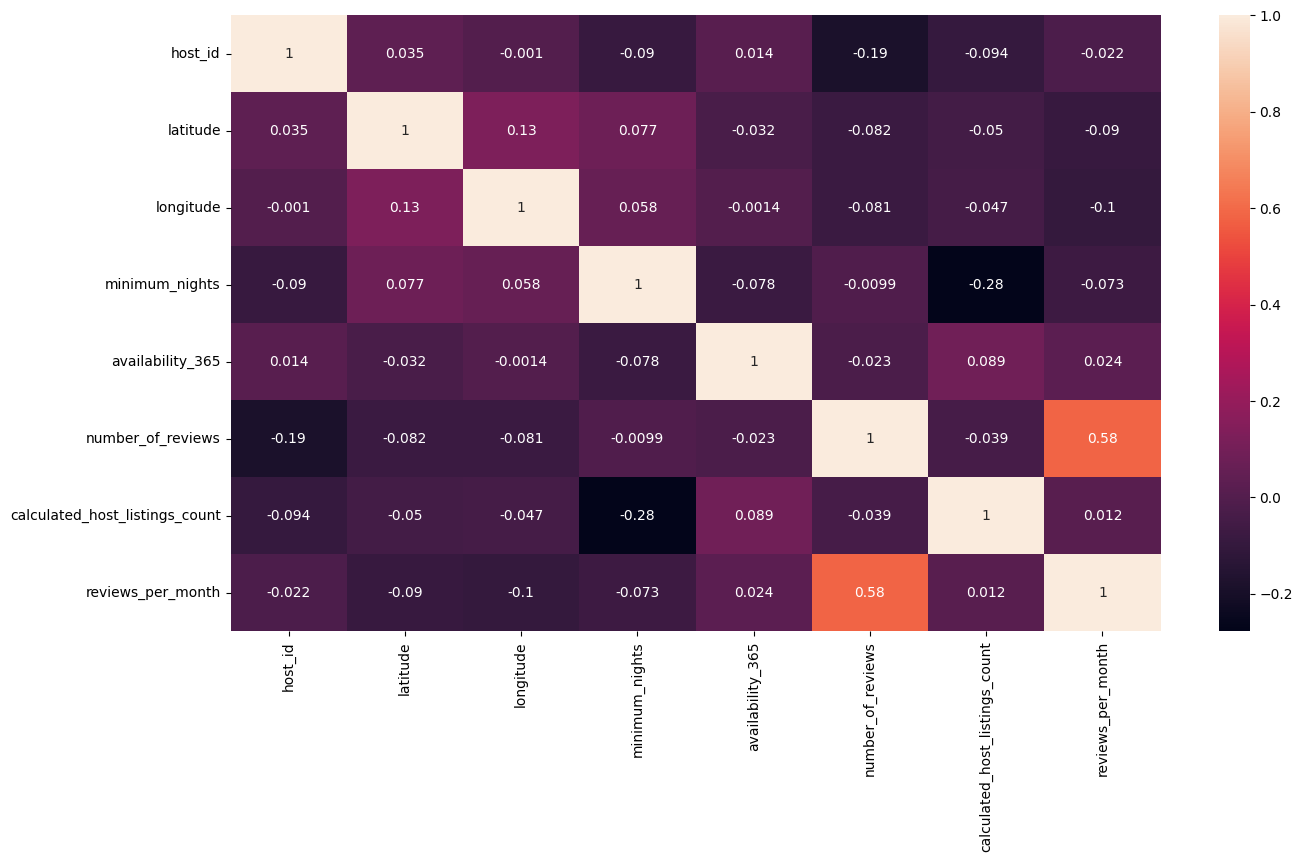

In [27]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns


In [28]:
airbnb.shape

(8076, 12)

In [29]:
airbnb.head(20)

,host_id,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,$144.00,1,359,42,7,0.28
1,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,$70.00,1,74,66,7,0.49
2,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,$85.00,1,52,92,7,0.69
3,37177,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,$60.00,1,73,30,7,0.19
4,3745284,"Athens, Attica, Greece",ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.989850,23.737790,Entire home/apt,$35.00,3,152,514,2,3.87
7,121318,"Athens, Attica, Greece",ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.976334,23.729834,Entire home/apt,$99.00,2,352,495,2,3.59
9,146553,"Athens, Αττική, Greece",ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.006730,23.727750,Entire home/apt,$30.00,5,174,72,2,0.46
11,225612,"Athens, Αττική, Greece",ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.976700,23.730640,Entire home/apt,$180.00,2,329,136,1,0.93
12,3954884,"Athens, Attica, Greece",ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,38.003980,23.731900,Entire home/apt,$48.00,4,181,180,1,1.42
13,290864,"Athens, Attica, Greece",ΣΤΑΔΙΟ,37.967380,23.740380,Entire home/apt,$32.00,6,126,30,1,0.30


# **Data Visualization**

In [31]:
airbnb['neighbourhood_cleansed'].unique()


array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ',
       'ΣΤΑΔΙΟ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΠΑΓΚΡΑΤΙ', 'ΙΛΙΣΙΑ',
       'ΚΕΡΑΜΕΙΚΟΣ', 'ΑΝΩ ΚΥΨΕΛΗ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΚΟΛΩΝΑΚΙ',
       'ΑΚΡΟΠΟΛΗ', 'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΛΥΚΑΒΗΤΤΟΣ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΖΑΠΠΕΙΟ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΚΥΨΕΛΗ',
       'ΓΟΥΒΑ', 'ΠΕΤΡΑΛΩΝΑ', 'ΠΡΟΜΠΟΝΑ', 'ΓΟΥΔΙ', 'ΓΚΑΖΙ', 'ΝΙΡΒΑΝΑ',
       'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ', 'ΝΕΑ ΚΥΨΕΛΗ',
       'ΠΕΝΤΑΓΩΝΟ', 'ΠΑΤΗΣΙΑ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΑΝΩ ΠΑΤΗΣΙΑ',
       'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΚΟΛΟΚΥΝΘΟΥ', 'ΣΕΠΟΛΙΑ', 'ΡΙΖΟΥΠΟΛΗ',
       '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΟΛΥΓΩΝΟ', 'ΡΗΓΙΛΛΗΣ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ'],
      dtype=object)

**Plot all Neighbourhood Group**

The problem that arises now, is that the columns don't get recognised as they are written in greek letters. So we will replace those with their existent english one

In [37]:
airbnb.replace(to_replace='ΠΑΓΚΡΑΤΙ',value='Pangrati',inplace=True)
airbnb.replace(to_replace='ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',value='Emporiko Trigono-Plaka',inplace=True)
airbnb.replace(to_replace='ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',value='Agios Konstantinos-Plateia Vathis',inplace=True)
airbnb.replace(to_replace='ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',value=' Mouseio-Exarcheia-Neapoli',inplace=True)
airbnb.replace(to_replace='ΠΕΝΤΑΓΩΝΟ',value='Pentagono',inplace=True)
airbnb.replace(to_replace='ΑΜΠΕΛΟΚΗΠΟΙ',value='Ampelokipoi',inplace=True)
airbnb.replace(to_replace='ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',value='Agios Nikolaos',inplace=True)
airbnb.replace(to_replace='ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ',value='Plateia Amerikis',inplace=True)
airbnb.replace(to_replace='ΣΤΑΔΙΟ',value='Stadio',inplace=True)
airbnb.replace(to_replace='ΙΛΙΣΙΑ',value='Ilissia',inplace=True)
airbnb.replace(to_replace='ΚΕΡΑΜΕΙΚΟΣ',value='Keramikos',inplace=True)
airbnb.replace(to_replace='ΑΝΩ ΚΥΨΕΛΗ',value='Ano Kipseli',inplace=True)
airbnb.replace(to_replace='ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ',value='Plateia Attikis',inplace=True)
airbnb.replace(to_replace='ΚΟΛΩΝΑΚΙ',value='Kolonaki',inplace=True)
airbnb.replace(to_replace='ΑΚΡΟΠΟΛΗ',value='Akropoli',inplace=True)
airbnb.replace(to_replace='ΘΗΣΕΙΟ',value='Thiseio',inplace=True)
airbnb.replace(to_replace='ΠΕΔΙΟ ΑΡΕΩΣ',value='Pedio Areos',inplace=True)
airbnb.replace(to_replace='ΛΥΚΑΒΗΤΤΟΣ',value='Lykavitos',inplace=True)
airbnb.replace(to_replace='ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',value='Koukaki-Makrigianni',inplace=True)
airbnb.replace(to_replace='ΖΑΠΠΕΙΟ',value='Zappeio',inplace=True)
airbnb.replace(to_replace='ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ',value='Akadimia Platonos',inplace=True)
airbnb.replace(to_replace='ΚΥΨΕΛΗ',value='Kipseli',inplace=True)
airbnb.replace(to_replace='ΓΟΥΒΑ',value='Gouva',inplace=True)
airbnb.replace(to_replace='ΠΕΤΡΑΛΩΝΑ',value='Petralona',inplace=True)
airbnb.replace(to_replace='ΠΡΟΜΠΟΝΑ',value='Prompona',inplace=True)
airbnb.replace(to_replace='ΓΟΥΔΙ',value='Goudi',inplace=True)
airbnb.replace(to_replace='ΓΚΑΖΙ',value='Gazi',inplace=True)
airbnb.replace(to_replace='ΝΙΡΒΑΝΑ',value='Nirvana',inplace=True)
airbnb.replace(to_replace='ΝΕΟΣ ΚΟΣΜΟΣ',value='Neos Kosmos',inplace=True)
airbnb.replace(to_replace='ΚΟΛΩΝΟΣ',value='Kolonos',inplace=True)
airbnb.replace(to_replace='ΒΟΤΑΝΙΚΟΣ',value='Votanikos',inplace=True)
airbnb.replace(to_replace='ΓΚΥΖΗ',value='Gkizi',inplace=True)
airbnb.replace(to_replace='ΝΕΑ ΚΥΨΕΛΗ',value='Nea Kipseli',inplace=True)
airbnb.replace(to_replace='ΠΕΝΤΑΓΩΝΟ',value='Pentagono',inplace=True)
airbnb.replace(to_replace='ΠΑΤΗΣΙΑ',value='Patisia',inplace=True)
airbnb.replace(to_replace='ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',value='Stathmos Larissis',inplace=True)
airbnb.replace(to_replace='ΑΝΩ ΠΑΤΗΣΙΑ',value='Ano Patisia',inplace=True)
airbnb.replace(to_replace='ΕΛΛΗΝΟΡΩΣΩΝ',value='Ellinoroson',inplace=True)
airbnb.replace(to_replace='ΚΟΛΟΚΥΝΘΟΥ',value='Kolokinthou',inplace=True)
airbnb.replace(to_replace='ΣΕΠΟΛΙΑ',value='Sepolia',inplace=True)
airbnb.replace(to_replace='ΡΙΖΟΥΠΟΛΗ',value='Rizoupoli',inplace=True)
airbnb.replace(to_replace='1Ο ΝΕΚΡΟΤΑΦΕΙΟ',value='10 Nekrotafeio',inplace=True)
airbnb.replace(to_replace='ΠΟΛΥΓΩΝΟ',value='Poligono',inplace=True)
airbnb.replace(to_replace='ΡΗΓΙΛΛΗΣ',value='Rigillis',inplace=True)
airbnb.replace(to_replace='ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ',value='Agios Eleftherios',inplace=True)
























In [38]:
airbnb['neighbourhood_cleansed'].unique()

array(['Ampelokipoi', ' Mouseio-Exarcheia-Neapoli',
       'Emporiko Trigono-Plaka', 'Agios Nikolaos', 'Plateia Amerikis',
       'Stadio', 'Agios Konstantinos-Plateia Vathis', 'Pangrati',
       'Ilissia', 'Keramikos', 'Ano Kipseli', 'Plateia Attikis',
       'Kolonaki', 'Akropoli', 'Thiseio', 'Pedio Areos', 'Lykavitos',
       'Koukaki-Makrigianni', 'Zappeio', 'Akadimia Platonos', 'Kipseli',
       'Gouva', 'Petralona', 'Prompona', 'Goudi', 'Gazi', 'Nirvana',
       'Neos Kosmos', 'Kolonos', 'Votanikos', 'Gkizi', 'Nea Kipseli',
       'Pentagono', 'Patisia', 'Stathmos Larissis', 'Ano Patisia',
       'Ellinoroson', 'Kolokinthou', 'Sepolia', 'Rizoupoli',
       '10 Nekrotafeio', 'Poligono', 'Rigillis', 'Agios Eleftherios'],
      dtype=object)

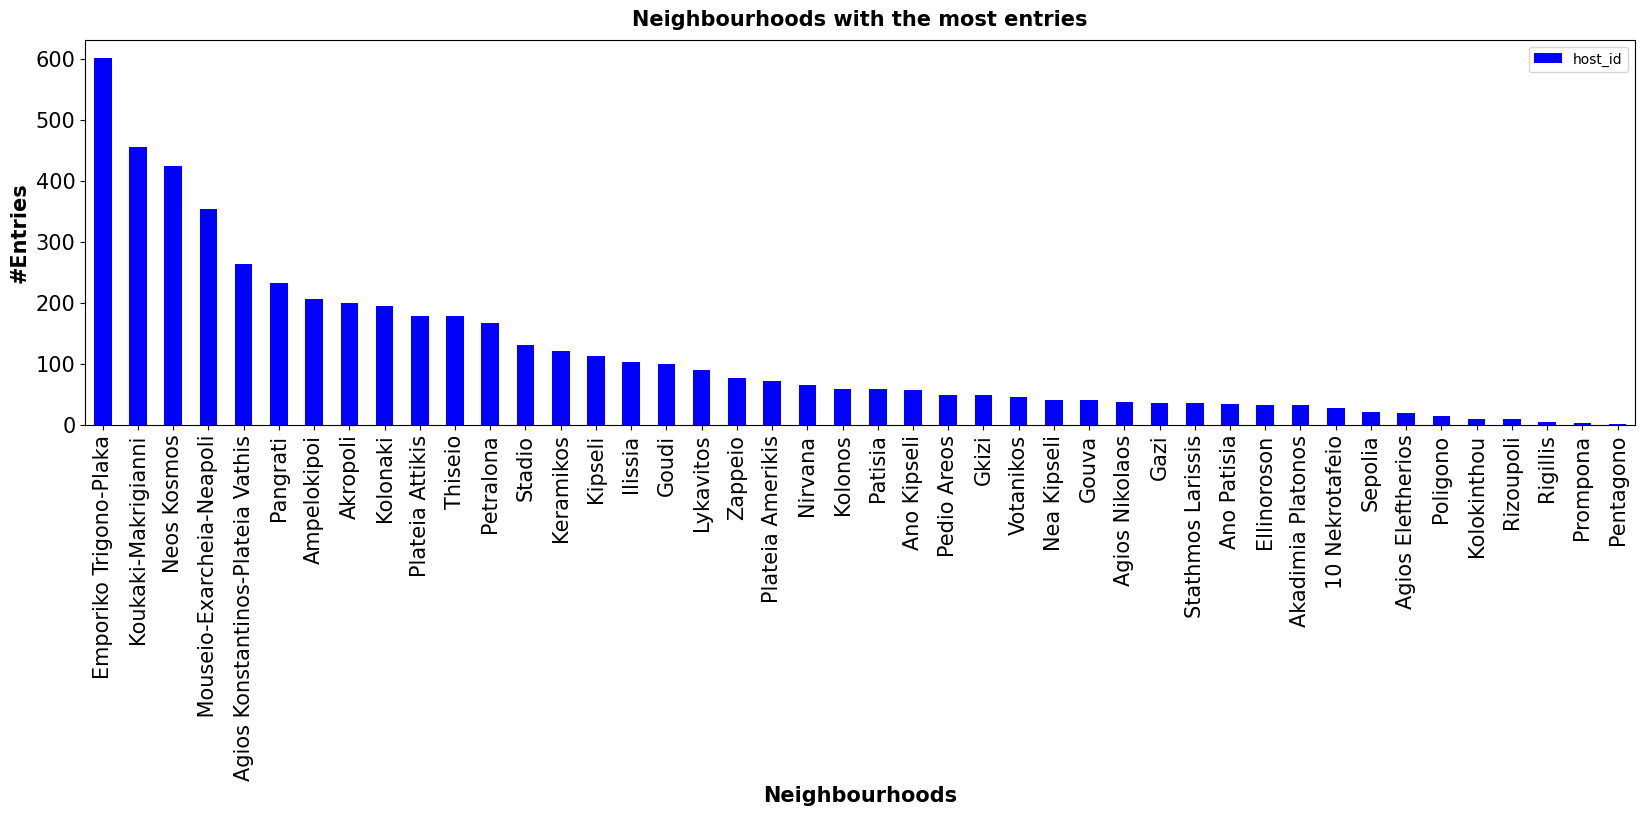

In [44]:
airbnb.groupby(by='neighbourhood_cleansed',as_index=False).agg({'host_id':'nunique'}).sort_values(['host_id'],ascending=False,ignore_index=True).plot.bar(x='neighbourhood_cleansed',color='blue',fontsize=15,figsize=(20,5))
plt.title('Neighbourhoods with the most entries',fontweight='bold',fontsize=15,pad=10)
plt.ylabel('#Entries',fontweight='bold',fontsize=15)
plt.xlabel('Neighbourhoods',fontweight='bold',fontsize=15)
plt.show()